In [1]:
%cd ~/tesis/VoiceClonAR

/home/nahue/tesis/VoiceClonAR


/home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [26]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from voiceclonar.quality_assessment.evaluation import SyntheticSpeechQA

In [10]:
tacotron2_path = Path("test/audios/tacotron2")
fastpitch_path = Path("test/audios/fastpitch")
fastpitch_rvc_path = Path("test/audios/fastpitch_rvc")

evaluator = SyntheticSpeechQA()
tacotron2_results = evaluator.evaluate_folder(tacotron2_path, reference_suffix="reference")
fastpitch_results = evaluator.evaluate_folder(fastpitch_path, reference_suffix="reference")
fastpitch_rvc_results = evaluator.evaluate_folder(fastpitch_rvc_path, reference_suffix="reference")

[NeMo W 2024-01-18 02:36:10 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:10 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:10 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:11 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:36:12 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:12 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:12 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:14 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:36:18 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
F1_tacotron2.wav  2.760806 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
F1_tacotron2.wav  3.273947 NISQA_TTS_v1


[NeMo W 2024-01-18 02:36:19 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:19 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:19 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:20 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:36:21 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:21 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:21 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:23 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:36:30 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
F2_tacotron2.wav  2.800036 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
F2_tacotron2.wav  2.949895 NISQA_TTS_v1


[NeMo W 2024-01-18 02:36:31 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:31 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:31 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:32 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:36:34 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:34 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:34 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:35 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:36:41 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
F3_tacotron2.wav  3.148021 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
F3_tacotron2.wav  3.318037 NISQA_TTS_v1


[NeMo W 2024-01-18 02:36:43 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:43 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:43 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:44 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:36:45 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:45 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:45 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:46 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:36:52 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
F4_tacotron2.wav  3.125634 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
F4_tacotron2.wav  3.605394 NISQA_TTS_v1


[NeMo W 2024-01-18 02:36:53 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:53 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:53 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:54 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:36:56 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:36:56 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:36:56 features:289] PADDING: 16
[NeMo I 2024-01-18 02:36:57 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:37:02 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
F5_tacotron2.wav  3.007994 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
F5_tacotron2.wav  2.909522 NISQA_TTS_v1


[NeMo W 2024-01-18 02:37:03 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:03 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:03 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:04 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:37:06 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:06 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:06 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:07 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:37:10 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
M1_tacotron2.wav  3.720948 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
M1_tacotron2.wav  3.205632 NISQA_TTS_v1


[NeMo W 2024-01-18 02:37:12 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:12 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:12 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:13 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:37:14 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:14 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:14 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:15 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:37:19 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
M2_tacotron2.wav  3.161525 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
M2_tacotron2.wav  2.063439 NISQA_TTS_v1


[NeMo W 2024-01-18 02:37:20 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:20 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:20 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:21 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:37:22 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:22 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:22 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:24 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:37:27 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
M3_tacotron2.wav  2.545603 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
M3_tacotron2.wav   2.90454 NISQA_TTS_v1


[NeMo W 2024-01-18 02:37:29 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:29 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:29 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:30 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:37:31 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:31 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:31 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:32 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:37:37 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
M4_tacotron2.wav  4.530068 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
M4_tacotron2.wav  3.507826 NISQA_TTS_v1


[NeMo W 2024-01-18 02:37:38 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:38 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:38 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:39 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:37:40 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:40 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:40 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:41 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:37:47 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
             deg  mos_pred            model
M5_tacotron2.wav  3.165935 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
             deg  mos_pred        model
M5_tacotron2.wav  3.061655 NISQA_TTS_v1


[NeMo W 2024-01-18 02:37:48 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:48 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:48 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:50 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:37:51 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:51 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:37:51 features:289] PADDING: 16
[NeMo I 2024-01-18 02:37:52 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:37:58 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arf_00295_fastpitch.wav  3.461505 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arf_00295_fastpitch.wav  3.007645 NISQA_TTS_v1


[NeMo W 2024-01-18 02:37:59 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:37:59 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:00 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:01 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:38:02 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:02 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:02 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:03 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:38:09 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arf_02121_fastpitch.wav  4.171466 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arf_02121_fastpitch.wav   4.11484 NISQA_TTS_v1


[NeMo W 2024-01-18 02:38:10 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:10 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:10 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:11 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:38:12 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:12 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:12 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:14 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:38:19 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arf_02484_fastpitch.wav  2.796024 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arf_02484_fastpitch.wav  4.444834 NISQA_TTS_v1


[NeMo W 2024-01-18 02:38:20 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:20 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:20 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:21 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:38:23 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:23 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:23 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:24 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:38:30 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arf_03397_fastpitch.wav  4.319911 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arf_03397_fastpitch.wav  3.132532 NISQA_TTS_v1


[NeMo W 2024-01-18 02:38:31 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:31 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:31 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:32 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:38:33 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:33 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:33 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:34 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:38:40 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arf_07060_fastpitch.wav  4.130047 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arf_07060_fastpitch.wav  3.560156 NISQA_TTS_v1


[NeMo W 2024-01-18 02:38:41 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:41 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:41 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:43 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:38:44 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:44 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:44 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:45 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:38:52 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arm_00610_fastpitch.wav  3.531142 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arm_00610_fastpitch.wav  2.511901 NISQA_TTS_v1


[NeMo W 2024-01-18 02:38:54 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:54 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:54 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:55 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:38:56 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:38:56 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:38:56 features:289] PADDING: 16
[NeMo I 2024-01-18 02:38:57 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:39:03 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arm_03397_fastpitch.wav  4.610235 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arm_03397_fastpitch.wav  4.106532 NISQA_TTS_v1


[NeMo W 2024-01-18 02:39:05 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:05 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:05 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:06 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:39:07 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:07 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:07 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:09 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:39:17 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arm_05223_fastpitch.wav  4.475918 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arm_05223_fastpitch.wav  3.297342 NISQA_TTS_v1


[NeMo W 2024-01-18 02:39:18 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:18 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:18 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:20 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:39:21 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:21 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:21 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:22 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:39:28 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arm_06136_fastpitch.wav  3.249119 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arm_06136_fastpitch.wav  2.810533 NISQA_TTS_v1


[NeMo W 2024-01-18 02:39:30 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:30 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:30 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:31 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:39:32 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:32 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:33 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:34 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master
[NeMo W 2024-01-18 02:39:41 nemo_logging:349] /home/nahue/tesis/VoiceClonAR/.venv/lib/python3.9/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
      mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
    


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                    deg  mos_pred            model
arm_09697_fastpitch.wav  3.882212 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                    deg  mos_pred        model
arm_09697_fastpitch.wav  3.333848 NISQA_TTS_v1


[NeMo W 2024-01-18 02:39:42 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:42 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:42 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:43 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:39:44 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:44 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:44 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:46 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arf_00295_fastpitch_rvc.wav  4.933809 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arf_00295_fastpitch_rvc.wav  4.623525 NISQA_TTS_v1


[NeMo W 2024-01-18 02:39:53 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:53 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:53 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:54 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:39:55 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:39:55 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:39:55 features:289] PADDING: 16
[NeMo I 2024-01-18 02:39:56 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arf_02121_fastpitch_rvc.wav  4.873359 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arf_02121_fastpitch_rvc.wav  4.200814 NISQA_TTS_v1


[NeMo W 2024-01-18 02:40:02 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:02 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:02 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:03 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:40:04 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:04 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:04 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:05 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arf_02484_fastpitch_rvc.wav  4.138609 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arf_02484_fastpitch_rvc.wav  4.525839 NISQA_TTS_v1


[NeMo W 2024-01-18 02:40:11 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:11 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:11 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:12 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:40:13 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:13 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:13 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:14 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arf_03397_fastpitch_rvc.wav  5.029419 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arf_03397_fastpitch_rvc.wav  4.318356 NISQA_TTS_v1


[NeMo W 2024-01-18 02:40:23 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:23 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:23 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:24 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:40:25 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:25 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:25 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:27 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arf_07060_fastpitch_rvc.wav  4.915525 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arf_07060_fastpitch_rvc.wav  4.080107 NISQA_TTS_v1


[NeMo W 2024-01-18 02:40:33 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:33 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:33 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:34 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:40:35 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:35 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:35 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:36 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arm_00610_fastpitch_rvc.wav  5.022411 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arm_00610_fastpitch_rvc.wav  4.280614 NISQA_TTS_v1


[NeMo W 2024-01-18 02:40:44 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:44 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:44 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:45 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:40:47 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:47 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:47 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:48 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arm_03397_fastpitch_rvc.wav  4.935382 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arm_03397_fastpitch_rvc.wav   3.96189 NISQA_TTS_v1


[NeMo W 2024-01-18 02:40:56 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:56 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:56 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:57 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:40:58 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:40:58 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:40:58 features:289] PADDING: 16
[NeMo I 2024-01-18 02:40:59 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arm_05223_fastpitch_rvc.wav  4.924561 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arm_05223_fastpitch_rvc.wav  4.427378 NISQA_TTS_v1


[NeMo W 2024-01-18 02:41:07 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:41:07 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:41:07 features:289] PADDING: 16
[NeMo I 2024-01-18 02:41:08 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:41:09 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:41:09 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:41:09 features:289] PADDING: 16
[NeMo I 2024-01-18 02:41:10 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arm_06136_fastpitch_rvc.wav  5.086848 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arm_06136_fastpitch_rvc.wav  4.140512 NISQA_TTS_v1


[NeMo W 2024-01-18 02:41:18 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:41:18 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:41:18 features:289] PADDING: 16
[NeMo I 2024-01-18 02:41:19 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


[NeMo W 2024-01-18 02:41:21 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-01-18 02:41:21 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-01-18 02:41:21 features:289] PADDING: 16
[NeMo I 2024-01-18 02:41:22 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/nahue/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


Using cache found in /home/nahue/.cache/torch/hub/harritaylor_torchvggish_master


Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_mos_only.tar
---> Predicting ...
                        deg  mos_pred            model
arm_09697_fastpitch_rvc.wav  5.003648 NISQAv2_mos_only
Device: cpu
Model architecture: NISQA
Loaded pretrained model from voiceclonar/quality_assessment/nisqa/weights/nisqa_tts.tar
---> Predicting ...
                        deg  mos_pred        model
arm_09697_fastpitch_rvc.wav  4.310323 NISQA_TTS_v1


In [ ]:
display(tacotron2_results)
display(fastpitch_results)
display(fastpitch_rvc_results)

In [12]:
display(tacotron2_results.describe())
display(fastpitch_results.describe())
display(fastpitch_rvc_results.describe())

,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.957634,2.081108,8.565210,3.196657,3.079989,0.693017,12.160745
std,0.012269,0.195934,2.322780,0.564623,0.432004,0.048154,2.697301
min,0.935346,1.649062,4.139872,2.545603,2.063439,0.628501,8.137285
25%,0.951208,2.014069,7.247563,2.852026,2.919615,0.648933,9.608125
50%,0.956535,2.088887,9.204009,3.136828,3.133644,0.695309,12.748157
75%,0.968556,2.209595,9.662805,3.164832,3.307015,0.726066,14.473050
max,0.972457,2.365378,12.277911,4.530068,3.605394,0.768033,15.119385


,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.997524,3.909379,23.222532,3.862758,3.432016,0.815530,9.666275
std,0.001857,0.192899,3.790571,0.586538,0.623061,0.044393,2.751735
min,0.992842,3.545130,16.988590,2.796024,2.511901,0.756997,5.339151
25%,0.996895,3.816094,20.824207,3.478914,3.038867,0.769267,7.350120
50%,0.998200,3.918365,22.656614,4.006130,3.315595,0.835663,10.290630
75%,0.998501,4.031097,25.315137,4.282799,3.969938,0.850202,11.157926
max,0.999283,4.163562,29.777756,4.610235,4.444834,0.871126,14.142849


,STOI,PESQ,SISDR,MOS (NISQA),NatMOS (NISQA),Similarity,Frechet Audio Distance
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.998637,4.008912,28.755906,4.886357,4.286936,0.821972,11.816003
std,0.001156,0.186080,2.494276,0.270636,0.202472,0.033784,4.314997
min,0.995588,3.598483,25.059952,4.138609,3.961890,0.768250,6.409492
25%,0.998608,3.948464,26.527001,4.917784,4.155587,0.806178,8.516469
50%,0.998893,3.999894,29.111833,4.934596,4.295469,0.827442,10.466333
75%,0.999211,4.154136,30.398980,5.017720,4.400122,0.842531,14.713077
max,0.999594,4.245575,32.124554,5.086848,4.623525,0.872307,19.258708


In [30]:
tts_results = pd.concat([tacotron2_results, fastpitch_results, fastpitch_rvc_results], ignore_index=True)
tts_labels = {
    "tacotron2": "Tacotron 2",
    "fastpitch": "FastPitch",
    "rvc": "FastPitch + RVC"
}
tts_results["tts"] = tts_results.audio_name.apply(lambda x: x.split("_")[-1]).replace(tts_labels)

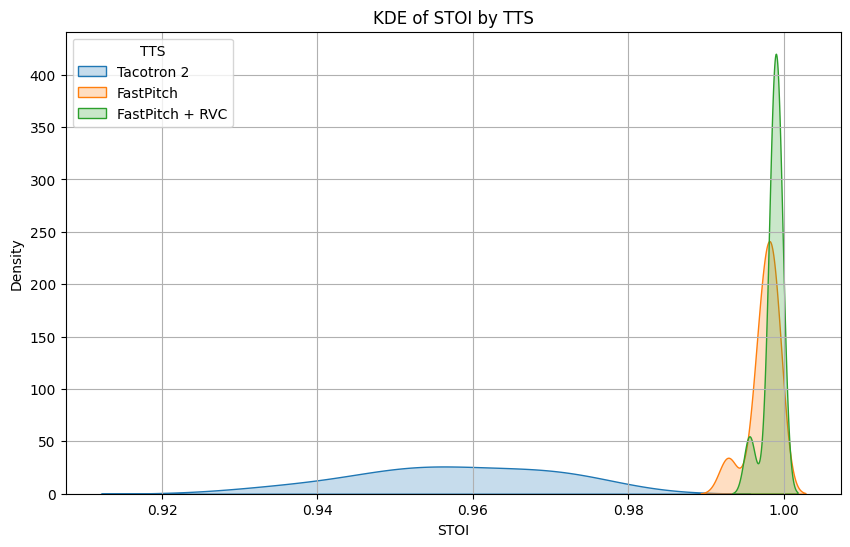

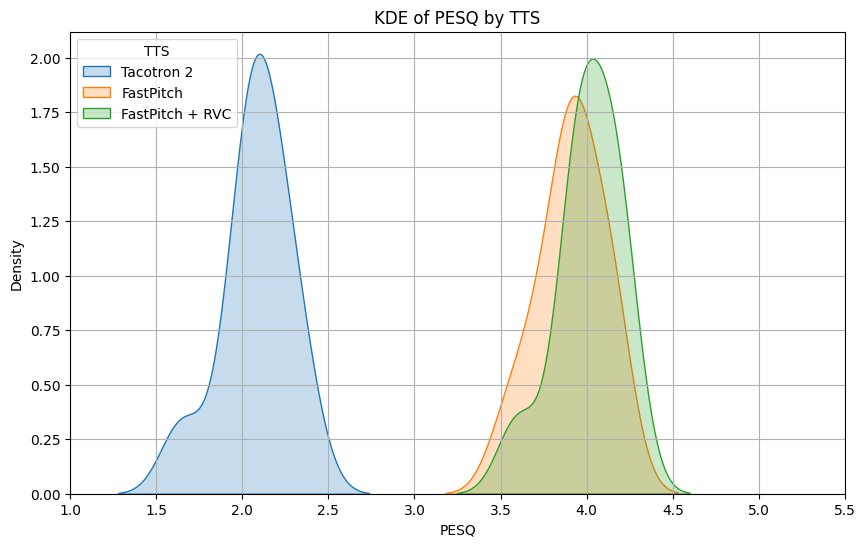

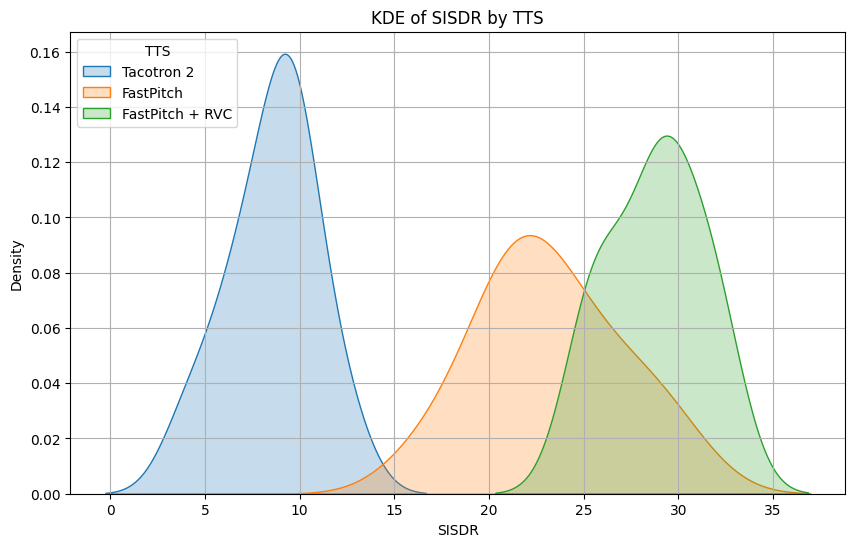

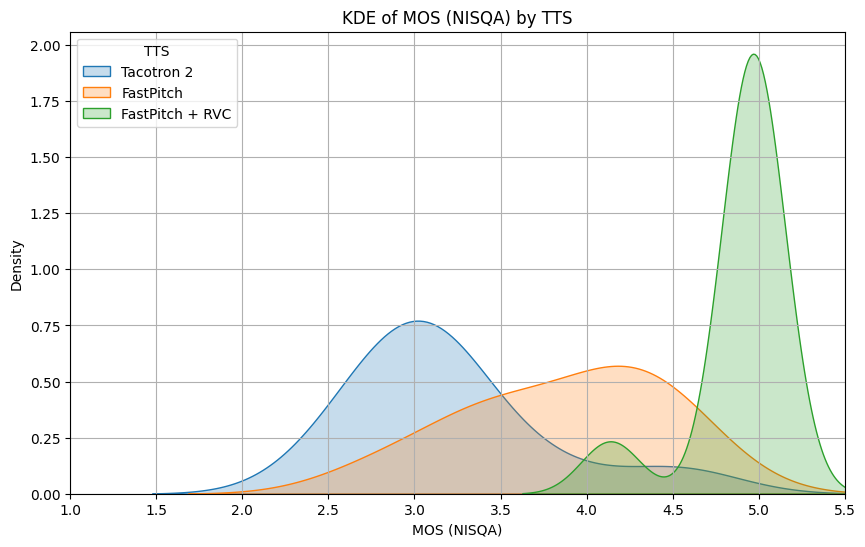

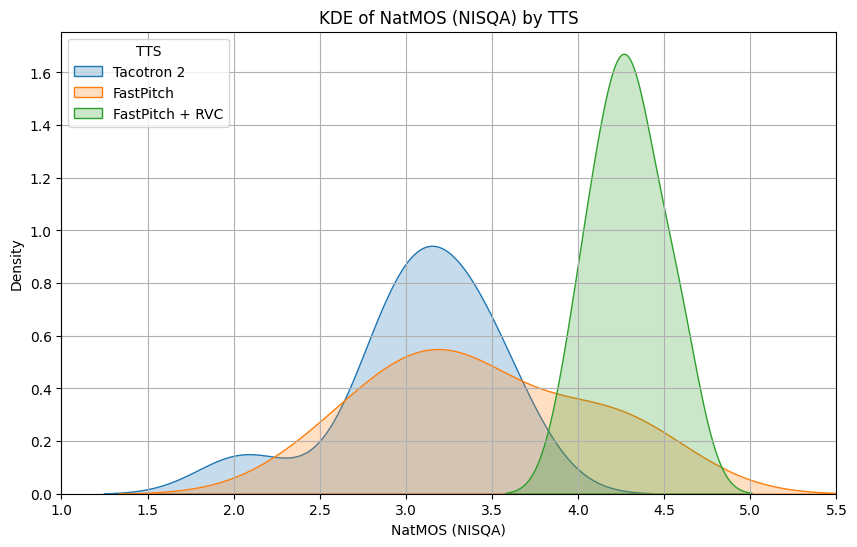

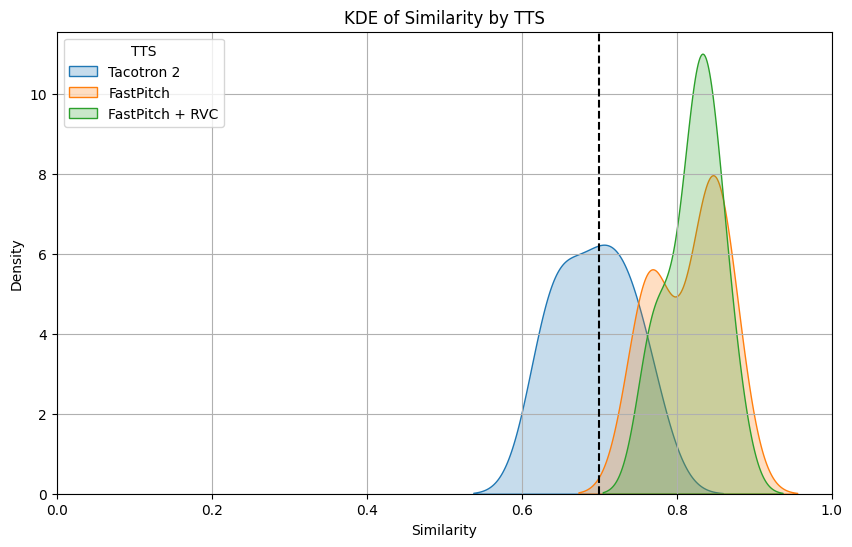

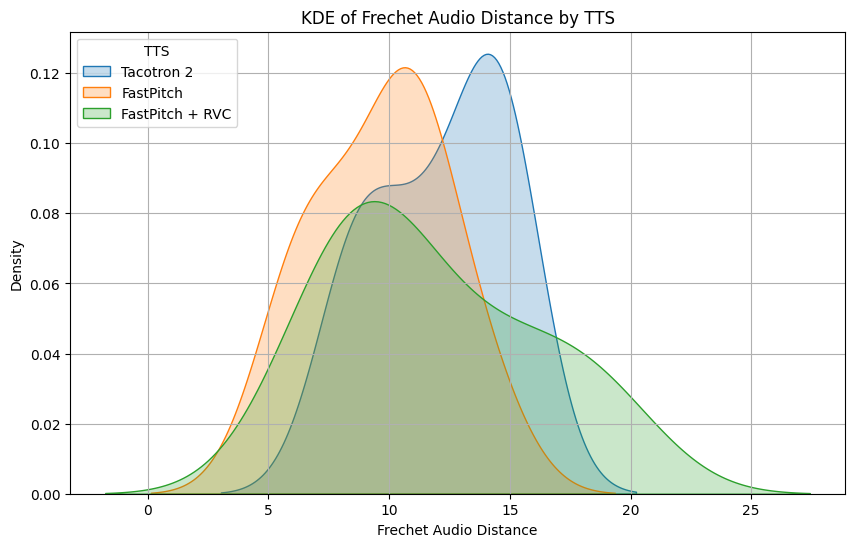

In [42]:
plot_settings = {
    "xlim": {
        "STOI": None,
        "PESQ": [1,5.5],
        "SISDR": None,
        "MOS (NISQA)": [1,5.5],
        "NatMOS (NISQA)": [1,5.5],
        "Similarity": [0,1],
        "Frechet Audio Distance": None
    },
}


numeric_columns = tts_results.select_dtypes(include=[float]).columns

tts_classes = tts_results["tts"].unique()

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    for tts_class in tts_classes:
        subset = tts_results[tts_results["tts"] == tts_class]
        sns.kdeplot(subset[column], label=tts_class, fill=True)

    if column == "Similarity":
        plt.axvline(x=0.7, color="black", linestyle="--")
    plt.title(f"KDE of {column} by TTS")
    plt.xlabel(column)
    plt.ylabel("Density")
    if plot_settings["xlim"][column]:
        plt.xlim(plot_settings["xlim"][column])
    plt.legend(title="TTS", loc="upper left")
    plt.grid()
    plt.show()